In [1]:
import os
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


# Create model bottom elevation layer
set bottom of model equal to 33 meters below top of bedrock (L3_Bottom_TopOfBedrock.tif)

In [2]:
#  set paths
layer_dir = '../source_data//Shapefiles/Layers_and_Zones/'
L3_file = 'L3_Bottom___TopOfBedrock.tif'
L3_file_path = os.path.join(layer_dir, L3_file)

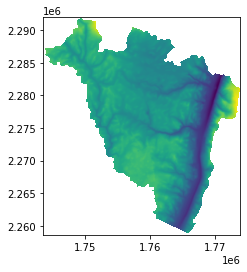

In [3]:
#  open l3 file and extract info (such as metadata, layer data, raster mask) and plot

with rasterio.open(L3_file_path) as src:
    crs = src.crs
    meta = src.meta
    nodata = meta['nodata']
    l3_tuple = src.read(1, masked=True),
    l3_data = l3_tuple[0].data
    l3_mask = l3_tuple[0].mask
    show(src)

In [4]:
#  calculate layer 4 elevations by subtracting 33 m from layer 3
#  don't perform subtraction in nodata cells

l4_data = np.where(l3_data != nodata, l3_data-33, l3_data)

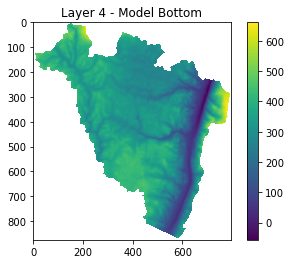

In [5]:
#  create a masked version and plot to check it out -- looks about the same...
ml4_data = np.ma.MaskedArray(l4_data, l3_mask)
plt.imshow(ml4_data)
plt.colorbar()
plt.title('Layer 4 - Model Bottom')
plt.show()

Unique difference values between
layer 3 and layer 4 are: [0.0, 33.0]


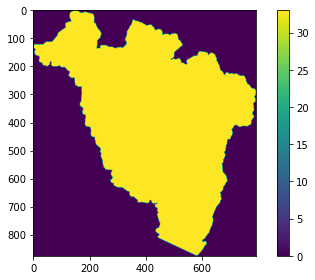

In [6]:
#  check difference between 3 and 4 to make sure calculation looks correct
l3l4_diff = l3_data - l4_data

print('Unique difference values between\nlayer 3 and layer 4 are: {}'.format(list(np.unique(l3l4_diff))))

ml3l4_diff = np.ma.MaskedArray(l3l4_diff, l3_mask)
plt.imshow(l3l4_diff)
plt.colorbar()
plt.tight_layout()
plt.show()

Difference should equal 33m inside the active model region and 0m in nodata areas

In [7]:
#  write calculated layer 4 data to new GTiff

outfile = 'L4_Bottom.tif'
outdir = '../processed_data/'

outpath = os.path.join(outdir, outfile)

dataset = rasterio.open(
    outpath, 
    'w', 
    driver=meta['driver'],
    height = l4_data.shape[0], 
    width = l4_data.shape[1],
    count=1,
    nodata = nodata,
    dtype=str(l4_data.dtype),
    crs = crs,
    transform=meta['transform'],
    compress='lzw'
)

dataset.write(l4_data, 1)
dataset.close()

# Check the minimum thicknesses of the model layers

In [8]:
top_file = 'top_50m_from_lidar.tif'
top_dir = '../source_data/Shapefiles/'
top_file_path = os.path.join(top_dir, top_file)

L1_file = 'L1_Bottom.tif'
L1_file_path = os.path.join(layer_dir, L1_file)

L2_file = 'L2_Bottom.tif'
L2_file_path = os.path.join(layer_dir, L2_file)

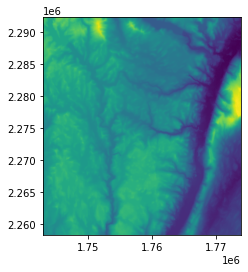

In [9]:
with rasterio.open(top_file_path) as src:
    top_tuple = src.read(1, masked=True),
    top_data = top_tuple[0].data
    top_mask = top_tuple[0].mask
    top_meta = src.meta
    show(src)

In [10]:
top_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': 0.0,
 'width': 619,
 'height': 680,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["Albers_Conic_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(50.0, 0.0, 1742955.0,
        0.0, -50.0, 2292285.0)}

In [11]:
with rasterio.open(L1_file_path) as src:
    l1_tuple = src.read(1, masked=True),
    l1_data = l1_tuple[0].data
    l1_mask = l1_tuple[0].mask
    l1_meta = src.meta

In [12]:
l1_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 795,
 'height': 876,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["Albers_Conic_Equal_Area",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(38.1, 0.0, 1743515.440640047,
        0.0, -38.10000000000011, 2291975.483224293)}

### Top of model ('top_50m_from_lidar.tif') has different dimensions and cell size than L1, L2, L3, and L4 bottoms

In [13]:
with rasterio.open(L2_file_path) as src:
    l2_tuple = src.read(1, masked=True),
    l2_data = l2_tuple[0].data
    l2_mask = l2_tuple[0].mask

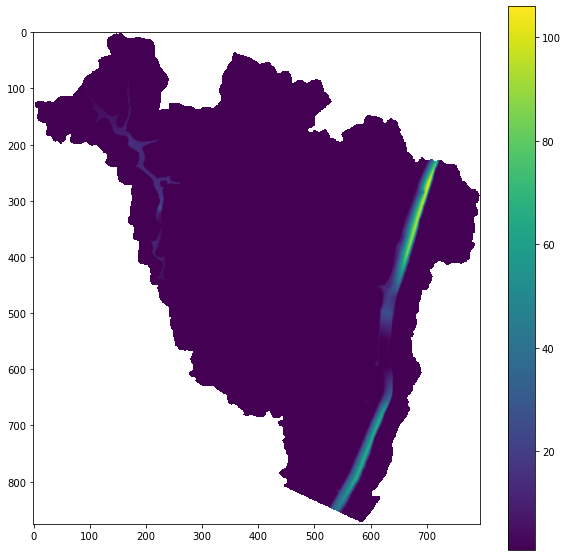

In [14]:
l1l2_diff  = l1_data - l2_data
ml1l2_diff = np.ma.MaskedArray(l1l2_diff, l1_mask)
plt.figure(figsize=(10,10))
plt.imshow(ml1l2_diff)
plt.colorbar()
plt.show()

In [15]:
print('the minimum difference is: {:.05f} meters'.format(ml1l2_diff.min()))

the minimum difference is: 0.99997 meters


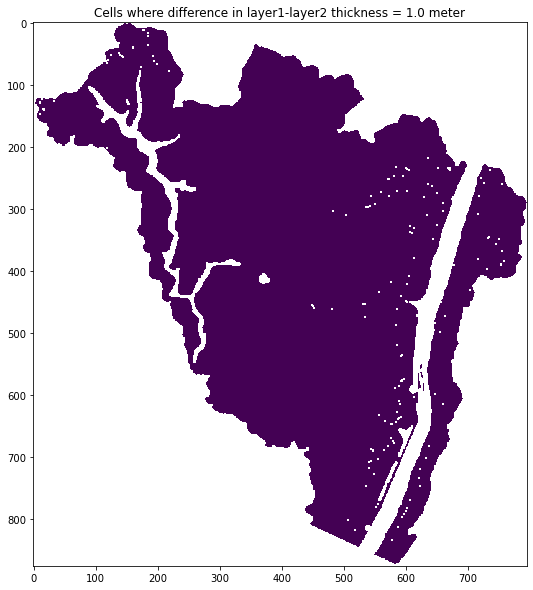

In [16]:
l1l2_isone = np.where((l1l2_diff == 1.), 1, np.nan)
plt.figure(figsize=(10,10))
plt.imshow(l1l2_isone)
plt.title('Cells where difference in layer1-layer2 thickness = 1.0 meter')
plt.show()

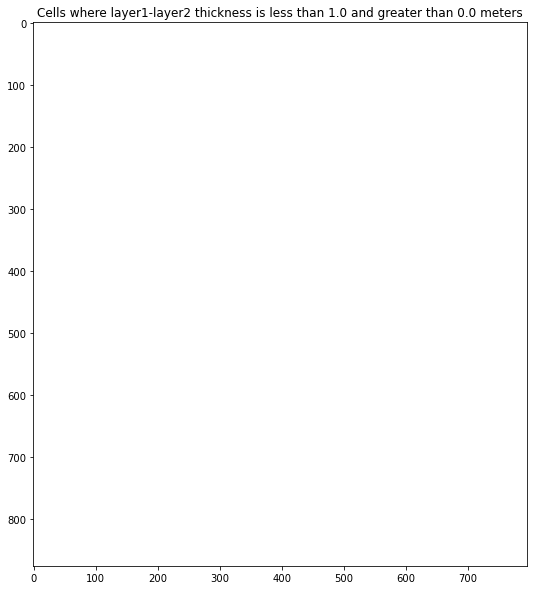

In [17]:
l1l2_lessthanone = np.where((l1l2_diff < 1.) & (l1l2_diff > 0.), 1, np.nan)
plt.figure(figsize=(10,10))
plt.imshow(l1l2_lessthanone)
plt.title('Cells where layer1-layer2 thickness is less than 1.0 and greater than 0.0 meters')
plt.show()

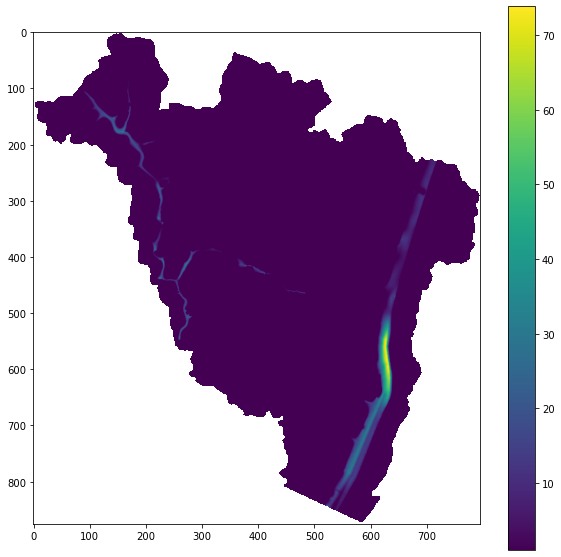

In [18]:
l2l3_diff  = l2_data - l3_data
ml2l3_diff = np.ma.MaskedArray(l2l3_diff, l1_mask)
plt.figure(figsize=(10,10))
plt.imshow(ml2l3_diff)
plt.colorbar()
plt.show()

In [19]:
print('the minimum difference is: {:.05f} meters'.format(ml2l3_diff.min()))

the minimum difference is: 0.99997 meters


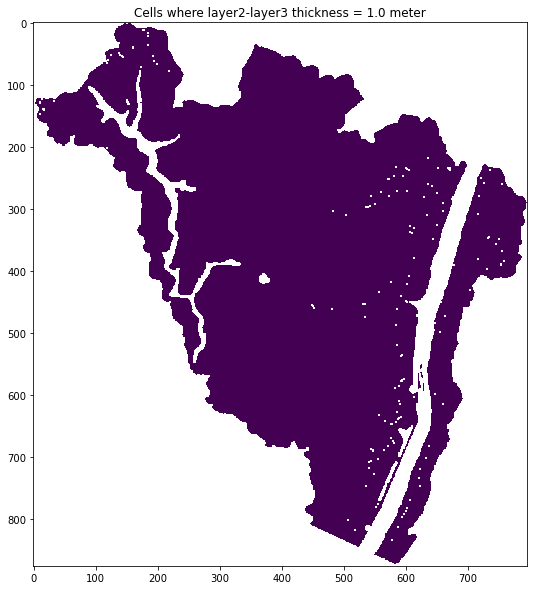

In [20]:
l2l3_isone = np.where((ml2l3_diff == 1.), 1, np.nan)
plt.figure(figsize=(10,10))
plt.imshow(l1l2_isone)
plt.title('Cells where layer2-layer3 thickness = 1.0 meter')
plt.show()

### Minimum difference between elevations of the bottoms of layer 1-2 and layer2-3 appears to be 1., but there are a few scattered points in the raster with differences slightly smaller, equal to 0.99997 meters